In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('who_suicide_statistics.csv')
data=data.sort_values(['year'],ascending=True)
print(data.shape)
data.head()

(43776, 6)


,country,year,sex,age,suicides_no,population
6204,Brazil,1979,female,15-24 years,385.0,12448100.0
26470,Netherlands,1979,male,55-74 years,217.0,1040500.0
26471,Netherlands,1979,male,75+ years,93.0,235800.0
2615,Austria,1979,male,75+ years,NaN,141900.0
2614,Austria,1979,male,55-74 years,NaN,573800.0


# Data visualization

C:\Users\Arati\AppData\Local\Temp\ipykernel_12728\1269735299.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),


<AxesSubplot:>

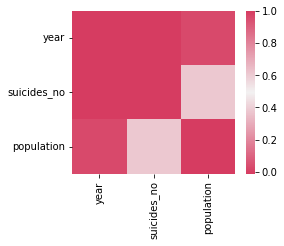

In [3]:
# correlation plot
f,ax=plt.subplots(figsize=(4,3))

corr=data.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(3,3,as_cmap=True),square=True,ax=ax)

In [4]:
# renaming the columns

data.rename({'sex' : 'gender', 'suicides_no' : 'suicides'}, inplace = True, axis = 1)

data.columns

Index(['country', 'year', 'gender', 'age', 'suicides', 'population'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43776 entries, 6204 to 25858
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     43776 non-null  object 
 1   year        43776 non-null  int64  
 2   gender      43776 non-null  object 
 3   age         43776 non-null  object 
 4   suicides    41520 non-null  float64
 5   population  38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
data.describe()

,year,suicides,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [7]:
data.isnull().sum()

country          0
year             0
gender           0
age              0
suicides      2256
population    5460
dtype: int64

In [8]:
data['country'].value_counts().count()

141

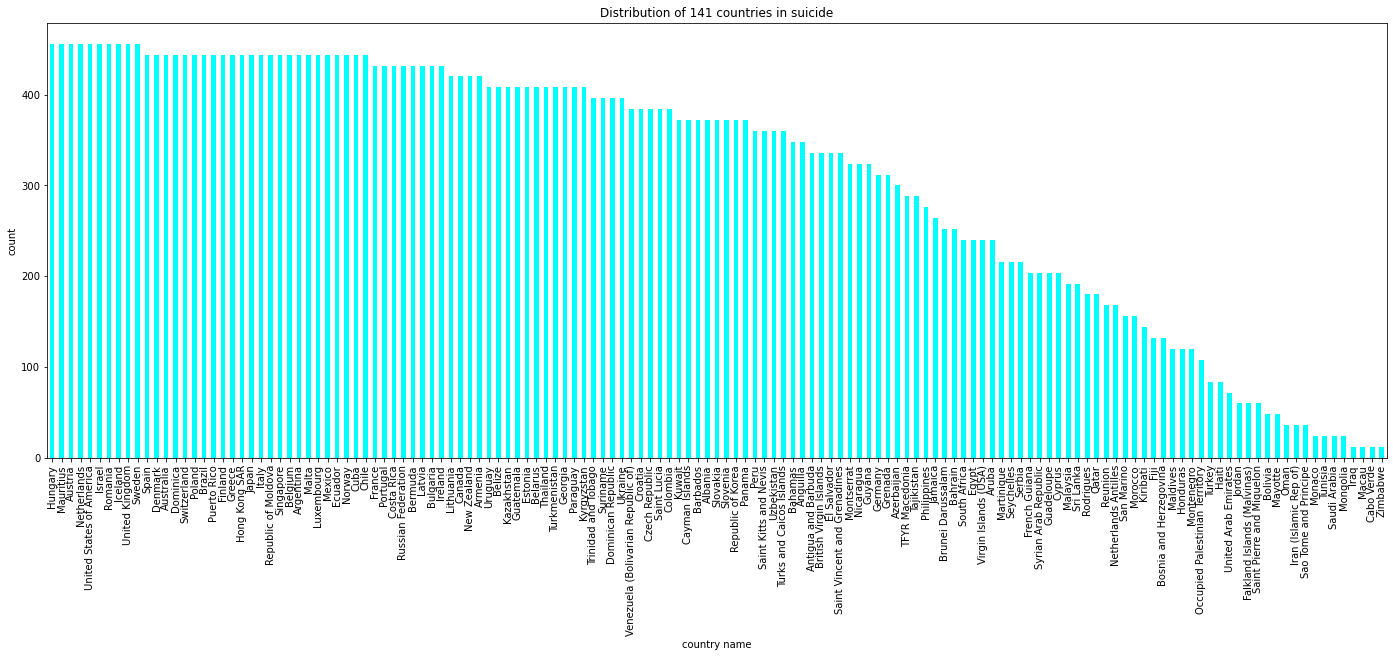

In [9]:
# visualizing the different countries distribution in the dataset

data['country'].value_counts(normalize=True)
data['country'].value_counts(dropna=False).plot.bar(color='cyan',figsize=(24,8))
plt.title('Distribution of 141 countries in suicide')
plt.xlabel('country name')
plt.ylabel('count')
plt.show()

In [10]:
data['year'].value_counts().count()


38

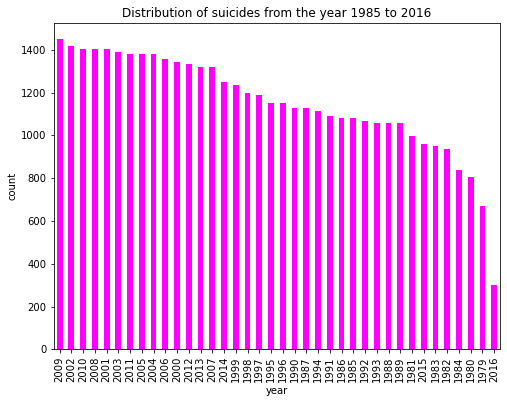

In [11]:
# visualizing the different year distribution in the dataset

data['year'].value_counts(normalize=True)
data['year'].value_counts(dropna = False,).plot.bar(color = 'magenta', figsize = (8, 6))

plt.title('Distribution of suicides from the year 1985 to 2016')
plt.xlabel('year')
plt.ylabel('count')
plt.show()
     


In [12]:
# label encoding for gender

from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])

data['gender'].value_counts()
     

0    21888
1    21888
Name: gender, dtype: int64

In [13]:
# replacing categorical values in the age column

data['age'] = data['age'].replace('5-14 years', 0)
data['age'] = data['age'].replace('15-24 years', 1)
data['age'] = data['age'].replace('25-34 years', 2)
data['age'] = data['age'].replace('35-54 years', 3)
data['age'] = data['age'].replace('55-74 years', 4)
data['age'] = data['age'].replace('75+ years', 5)

#data['age'].value_counts()

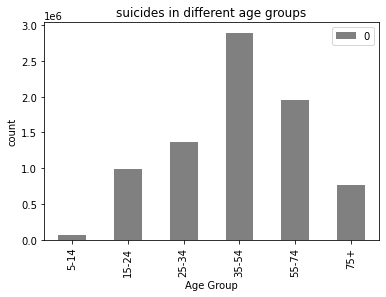

In [14]:
# suicides in different age groups

x1 = data[data['age'] == 0]['suicides'].sum()
x2 = data[data['age'] == 1]['suicides'].sum()
x3 = data[data['age'] == 2]['suicides'].sum()
x4 = data[data['age'] == 3]['suicides'].sum()
x5 = data[data['age'] == 4]['suicides'].sum()
x6 = data[data['age'] == 5]['suicides'].sum()

x = pd.DataFrame([x1, x2, x3, x4, x5, x6])
x.index = ['5-14', '15-24', '25-34', '35-54', '55-74', '75+']
x.plot(kind = 'bar', color = 'grey')

plt.title('suicides in different age groups')
plt.xlabel('Age Group')
plt.ylabel('count')
plt.show()

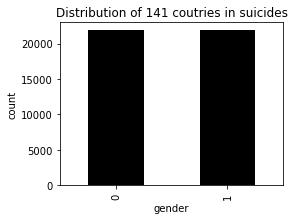

In [15]:
# visualising the gender distribution in the dataset

data['gender'].value_counts(normalize = True)
data['gender'].value_counts(dropna = False).plot.bar(color = 'black', figsize = (4, 3))

plt.title('Distribution of 141 coutries in suicides')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()
     

In [16]:
# total population of 141 countres over which the suicides survey is committed

data['population'].sum()

63761315943.0

In [17]:
# Average population

Avg_pop = data['population'].mean()
print(Avg_pop)
     

1664091.1353742562


In [18]:
# total number of suicides committed in the 141 countries from 1985 to 2016

data['suicides'].sum()

8026455.0

In [19]:
# Average suicide in the world

Avg_sui = data['suicides'].mean()
print(Avg_sui)
     

193.3153901734104


In [20]:
# Imputing the NaN values from the population column

data['population'] = data['population'].fillna(data['population'].median())
data['population'].isnull().any()

False

In [21]:
# Imputing the values suicides no column

data['suicides'] = data['suicides'].fillna(0)
data['suicides'].isnull().any()

False

In [22]:
# rearranging the columns 

data = data[['country', 'year', 'gender', 'age', 'population', 'suicides']]
data.head(0)
     

,country,year,gender,age,population,suicides


In [23]:
# Removing the country Column

data = data.drop(['country'], axis = 1)
data.head(0)

,year,gender,age,population,suicides


In [24]:
#splitting the data into dependent and independent variables

x = data.iloc[:,:-1]
y = data.iloc[:,-1]

print(x.shape)
print(y.shape)

(43776, 4)
(43776,)


In [25]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
     

(32832, 4)
(32832,)
(10944, 4)
(10944,)


In [26]:
# min max scaling

# importing the min max scaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# scaling the independent variables
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [27]:
# using principal component analysis

from sklearn.decomposition import PCA

# creating a principal component analysis model
#pca = PCA(n_components = None)

# feeding the independent variables to the PCA model
#x_train = pca.fit_transform(x_train)
#x_test = pca.transform(x_test)

# visualising the principal components that will explain the highest share of variance
#explained_variance = pca.explained_variance_ratio_
#print(explained_variance)

# creating a principal component analysis model
#pca = PCA(n_components = 1)

# feeding the independent variables to the PCA model
#x_train = pca.fit_transform(x_train)
#x_test = pca.transform(x_test)

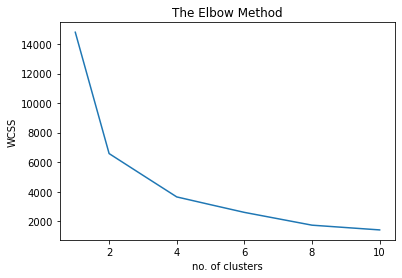

In [28]:
# applying k means clustering

# selecting the best choice for no. of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x_train)
    wcss.append(km.inertia_)
    
  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no. of clusters')
plt.ylabel('WCSS')
plt.show()


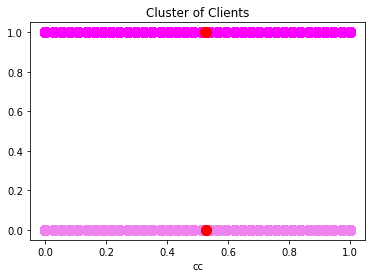

In [29]:
# applying kmeans with 4 clusters

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x_train)

# visualising the clusters

plt.scatter(x_train[y_means == 0, 0], x_train[y_means == 0, 1], s = 100, c = 'pink', label = 'cluster 1')
plt.scatter(x_train[y_means == 1, 0], x_train[y_means == 1, 1], s = 100, c = 'cyan', label = 'cluster 2')
plt.scatter(x_train[y_means == 2, 0], x_train[y_means == 2, 1], s = 100, c = 'magenta', label = 'cluster 3')
plt.scatter(x_train[y_means == 3, 0], x_train[y_means == 3, 1], s = 100, c = 'violet', label = 'cluster 4')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 100, c = 'red', label = 'centroids')

plt.title('Cluster of Clients')
plt.xlabel('cc')
plt.show()

     

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# creating the model
model = LinearRegression()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 356895.26574870356
RMSE : 597.4071189303853
r2_score : 0.3911230760802389


In [31]:
from sklearn.svm import SVR

# creating the model
model = SVR()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)


MSE : 561498.366917432
RMSE : 749.3319470818204
r2_score : 0.04206238847846855


In [32]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

     

MSE : 80968.68116265886
RMSE : 284.54996250686605
r2_score : 0.861864344384796


In [33]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 150019.76546714373
RMSE : 387.32385088856034
r2_score : 0.7440605631650059


In [34]:
from sklearn.ensemble import AdaBoostRegressor

# creating the model
model = AdaBoostRegressor()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)


MSE : 267336.8379548155
RMSE : 517.0462628767522
r2_score : 0.5439131667860286


In [ ]:
from sklearn.neural_network import MLPClassifier

# creating the model
model = MLPClassifier(hidden_layer_sizes = 100, max_iter = 50 )

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)